<a href="https://colab.research.google.com/github/Rajanikant/ML/blob/master/minset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import h5py

In [3]:
from google.colab import files
uploaded = files.upload()

Saving SVHN_single_grey1.h5 to SVHN_single_grey1.h5


In [0]:
import io
f = h5py.File('SVHN_single_grey1.h5', 'r')


In [6]:
list(f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

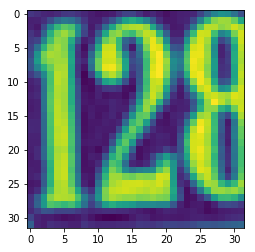

Label:  <HDF5 dataset "y_train": shape (42000,), type "|u1">


In [8]:
plt.imshow(f['X_train'][0])    # show first number in the dataset
plt.show()
print('Label: ', f['y_train'])

In [0]:
X_train = np.array(f['X_train']).reshape((f['X_train'].shape[0], -1))
X_test = np.array(f['X_test']).reshape((f['X_test'].shape[0], -1))
y_train = np.array(f['y_train']).reshape((f['y_train'].shape[0], -1))
y_test = np.array(f['y_test']).reshape((f['y_test'].shape[0], -1))
X_val = np.array(f['X_val']).reshape((f['X_val'].shape[0], -1))
y_val = np.array(f['y_val']).reshape((f['y_val'].shape[0], -1))

In [0]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
X_val = pd.DataFrame(X_val)
y_val = pd.DataFrame(y_val)

In [11]:
y_val.shape

(60000, 1)

In [0]:
kVals = range(1, 30, 2)
accuracies = []

In [0]:
for k in range(1, 30, 2):
          # train the k-Nearest Neighbor classifier with the current value of `k`
          model = KNeighborsClassifier(n_neighbors=k)
          model.fit(X_train, y_train)
          # evaluate the model and update the accuracies list
          score = model.score(X_val, y_val)
          print("k=%d, accuracy=%.2f%%" % (k, score * 100))
          accuracies.append(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
